In [2]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import math # log function is inside this library
from sklearn import metrics

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


#### Import data

In [3]:
df_data_raw = pd.read_csv("bank-full.csv")  

### Deliverable – 1 (Exploratory data quality report) – (10)

#### 1.	Univariate analysis

In [4]:
# initial inspection
df_data_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# data types

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# detail inspection
df_data_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


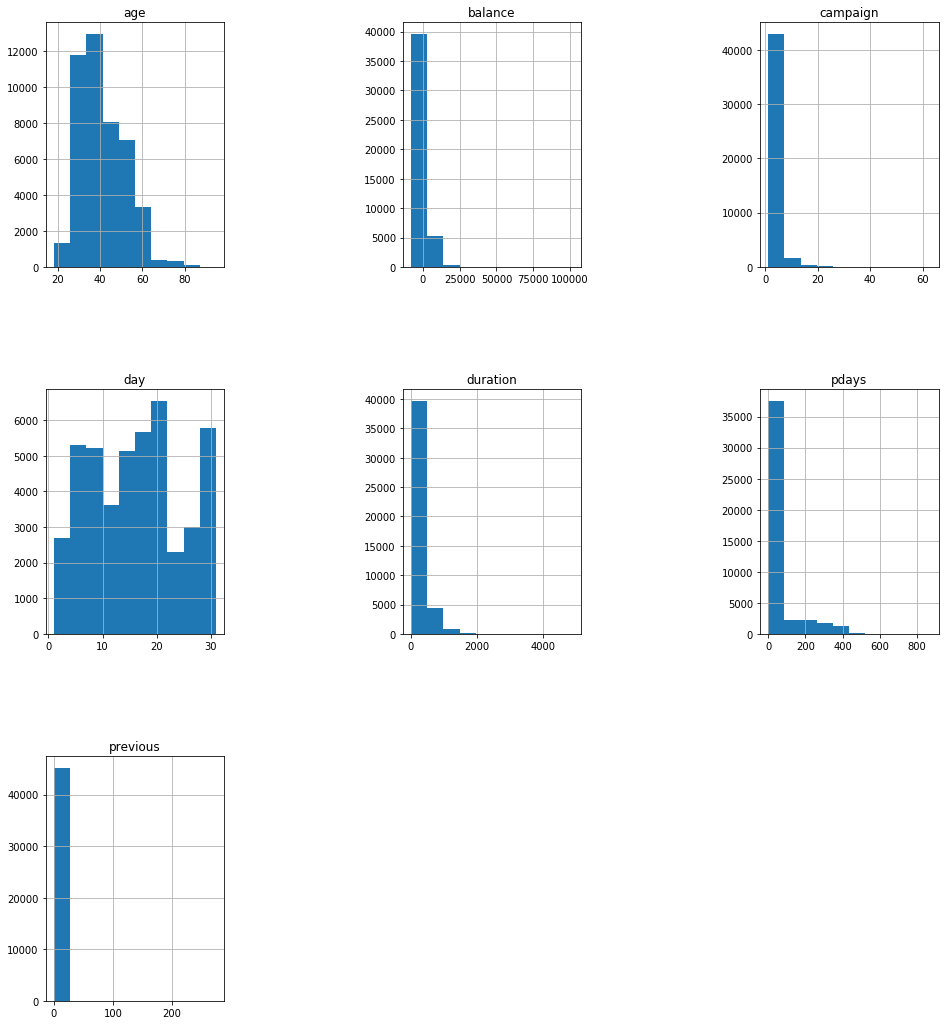

In [7]:
# Draw histograms of all numerical attributes
column_list = list(['age','balance','day','duration','campaign','pdays','previous'])

df_data_raw[column_list].hist(figsize = (16,18))
plt.subplots_adjust(hspace=0.5, wspace=1) 
plt.show()

#### Comments: 

The distributions of age follows close to normal distributions, which is not unexpected. <br>
The distributions of day follows something resembeling a normal distribution, but not quite. <br>
The distributions of the other features seem to be quite skewed. 

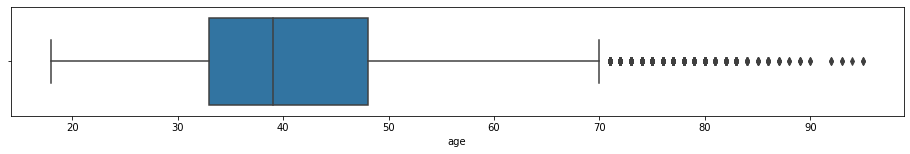

In [8]:
plt.figure(figsize=(16, 2))
sns.boxplot('age',data=df_data_raw)

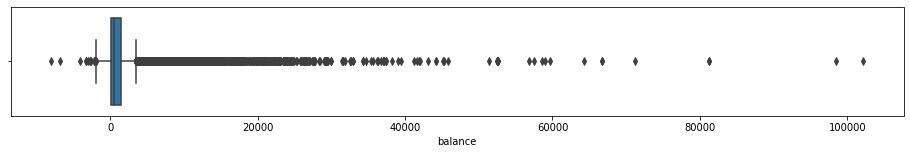

In [9]:
plt.figure(figsize=(16, 2))
sns.boxplot('balance',data=df_data_raw)

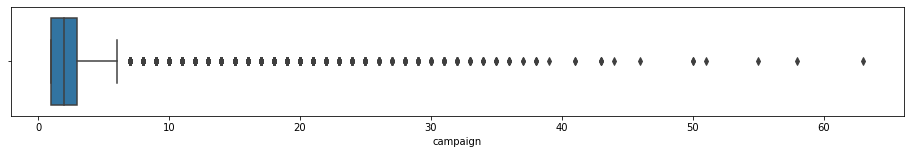

In [10]:
plt.figure(figsize=(16, 2))
sns.boxplot('campaign',data=df_data_raw)

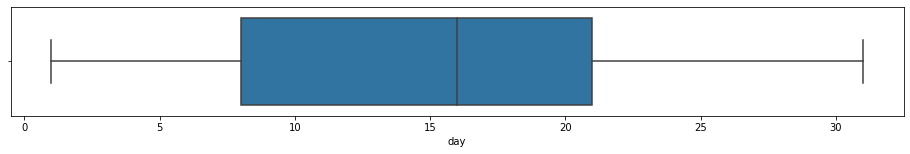

In [11]:
plt.figure(figsize=(16, 2))
sns.boxplot('day',data=df_data_raw)

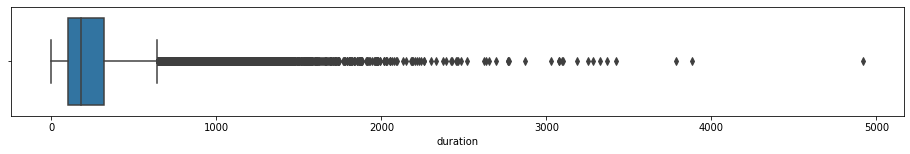

In [12]:
# this variable must be discarded for model building, since it is 'leaking' data from the target variable 

plt.figure(figsize=(16, 2))
sns.boxplot('duration',data=df_data_raw)

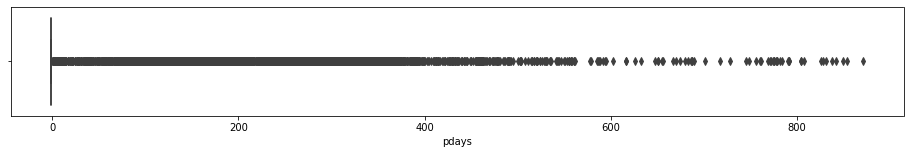

In [13]:
plt.figure(figsize=(16, 2))
sns.boxplot('pdays',data=df_data_raw)

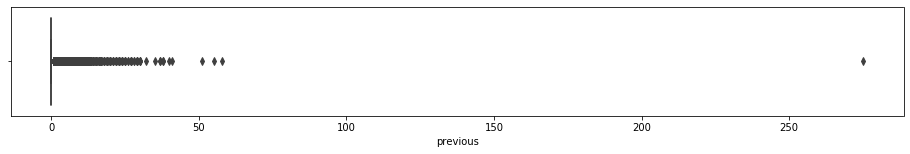

In [14]:
plt.figure(figsize=(16, 2))
sns.boxplot('previous',data=df_data_raw)

##### Detail inspection of categorical variables



In [15]:
# function to draw custom count plot with counts displayed above columns

def custom_countplot(dataframe,coulmn):
    
    chart = sns.countplot(dataframe[coulmn])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45);
    
    i=0
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x()+p.get_width()/2., height + 100,
            dataframe[coulmn].value_counts()[i],ha="center")
        i += 1
   

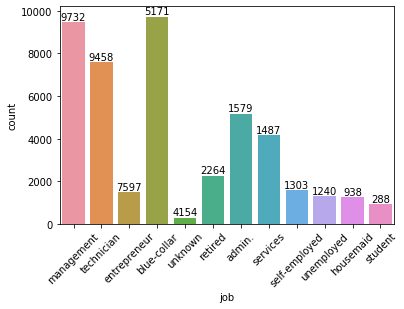

In [16]:
custom_countplot(df_data_raw,'job')

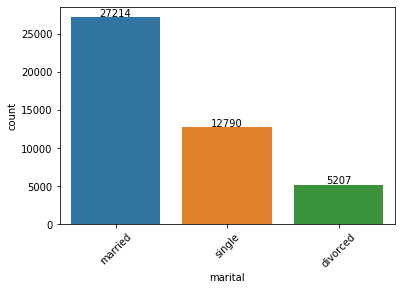

In [17]:
custom_countplot(df_data_raw,'marital')

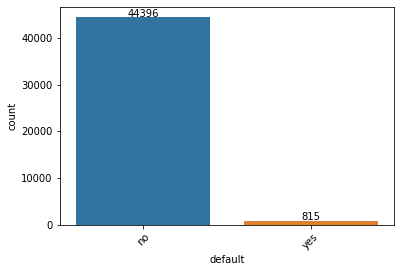

In [18]:
custom_countplot(df_data_raw,'default')

Due to the string imbalance we might consider deleting this feature as it will not provide a lot of info.

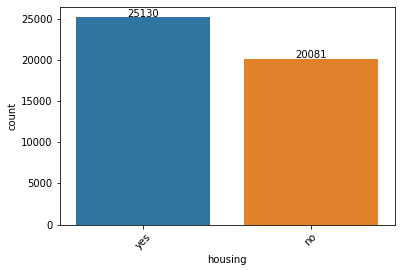

In [19]:
custom_countplot(df_data_raw,'housing')

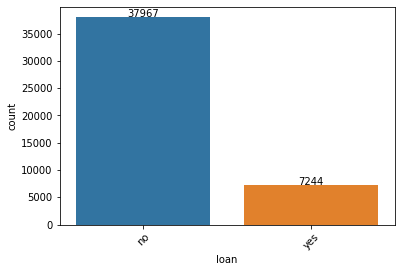

In [20]:
custom_countplot(df_data_raw,'loan')

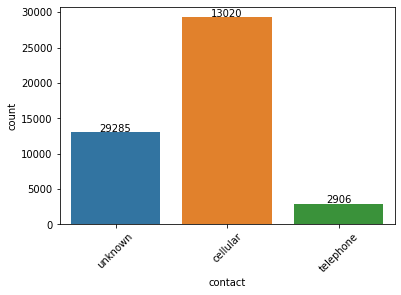

In [21]:
custom_countplot(df_data_raw,'contact')

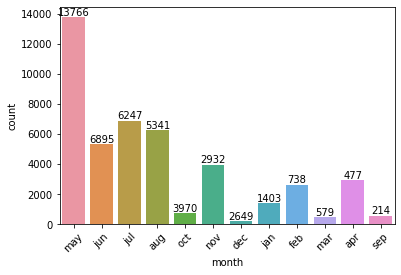

In [22]:
custom_countplot(df_data_raw,'month')

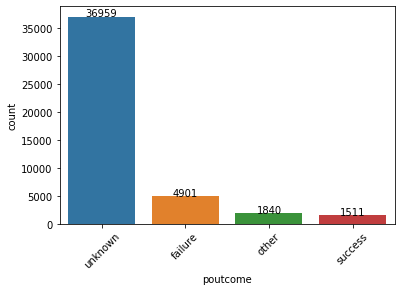

In [23]:
custom_countplot(df_data_raw,'poutcome')

In [24]:
# Maybe assume unknown, other = failure?

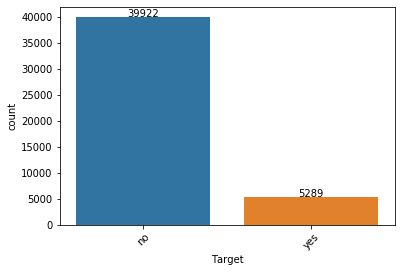

In [25]:
custom_countplot(df_data_raw,'Target')

#### 1.	Bivariate analysis

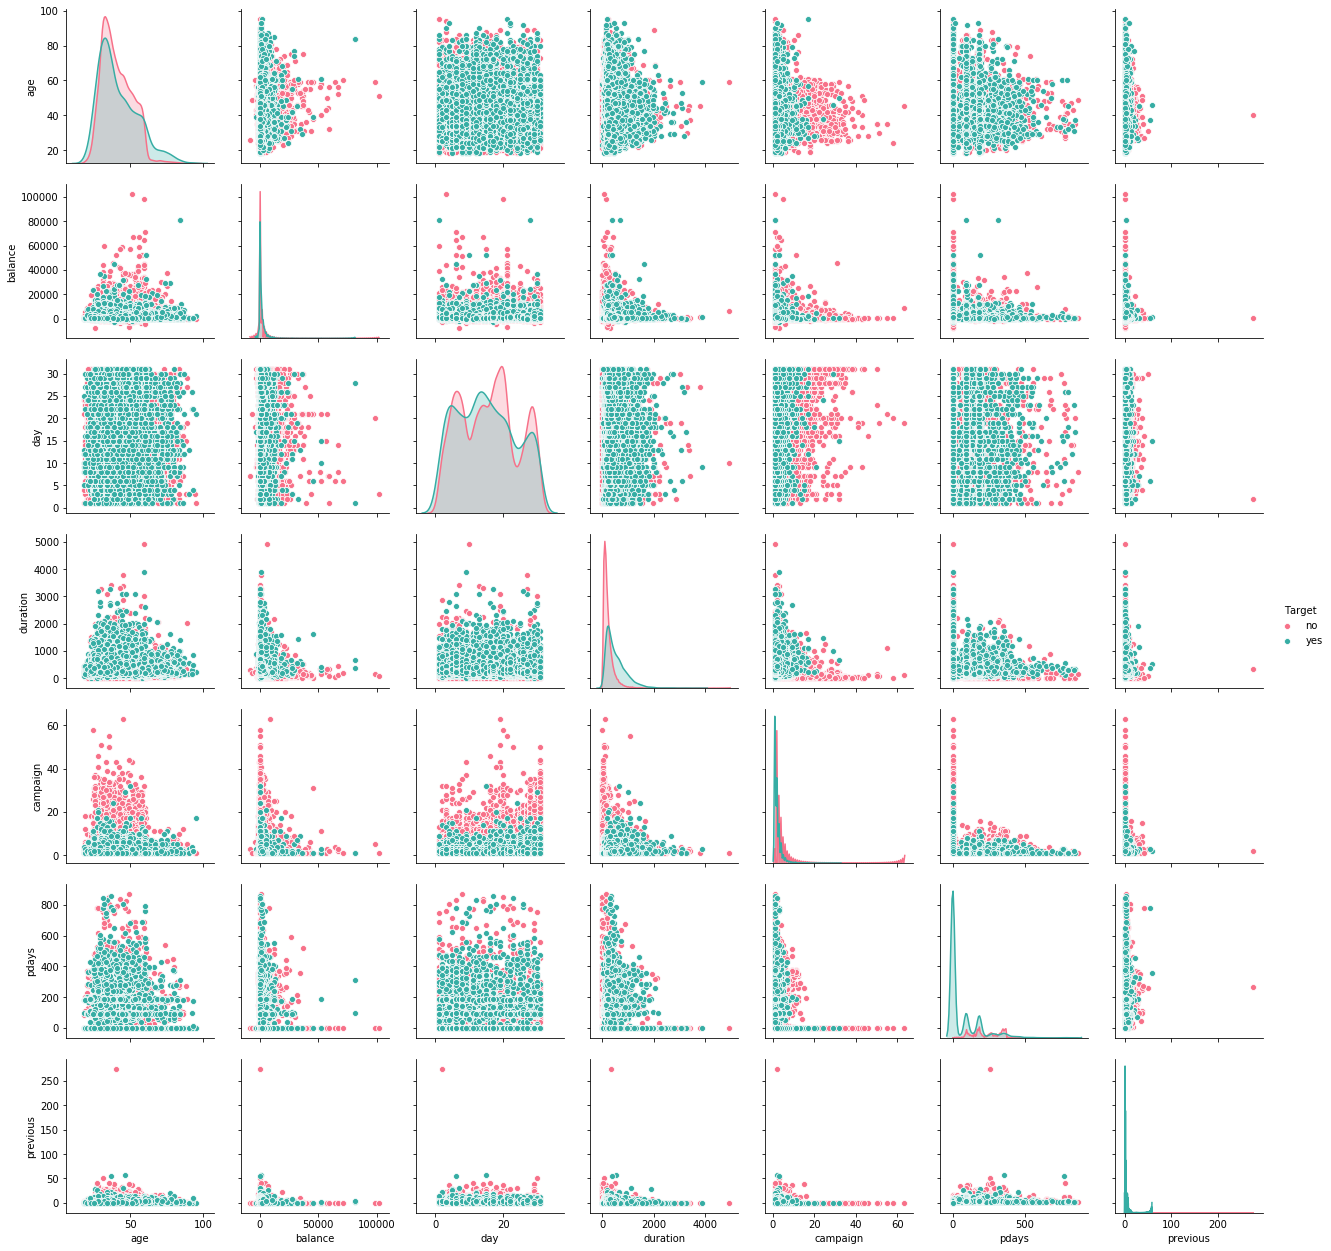

In [26]:
sns.pairplot(df_data_raw, hue="Target", palette="husl")

# sns.pairplot(pima_df, hue="class", palette="husl")

Note: No obvious linear relationships can be seen in the pairplot.
      Very skew distributions for a number of features can be seen.

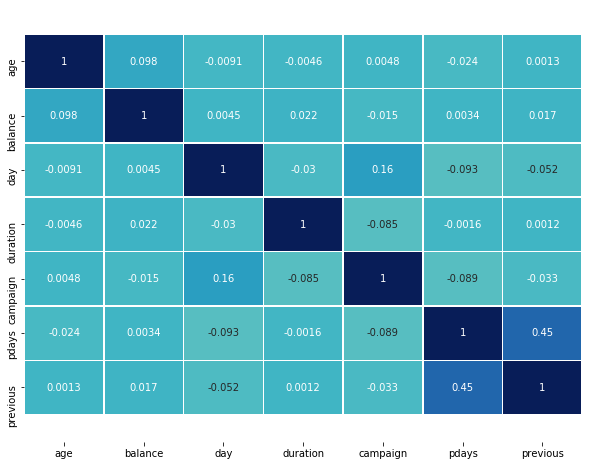

In [27]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_data_raw.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Note: no strong correlations found for the variables shown in the heat-map.

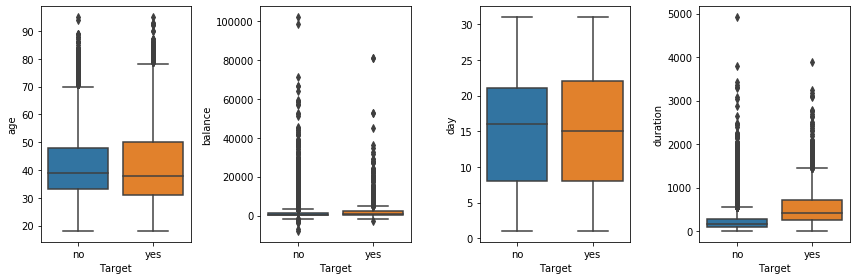

In [28]:
fig, ax = plt.subplots(figsize=(12,4))
plt.subplot(1, 4, 1)
sns.boxplot('Target','age',data=df_data_raw)

plt.subplot(1, 4, 2)
sns.boxplot('Target','balance',data=df_data_raw)

plt.subplot(1, 4, 3)
sns.boxplot('Target','day',data=df_data_raw)
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.boxplot('Target','duration',data=df_data_raw)
plt.tight_layout()

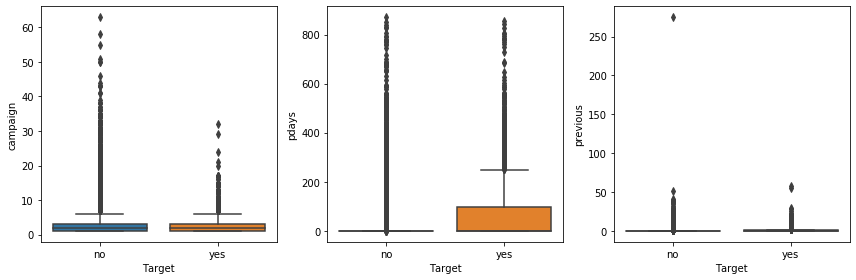

In [29]:
fig, ax = plt.subplots(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.boxplot('Target','campaign',data=df_data_raw)

plt.subplot(1, 3, 2)
sns.boxplot('Target','pdays',data=df_data_raw)

plt.subplot(1, 3, 3)
sns.boxplot('Target','previous',data=df_data_raw)
plt.tight_layout()



Note: the large number of outliers in some of the features make it hard to see relationships in the boxplots.

In [30]:
def get_ct(df, var):
    ct_res = pd.crosstab(df[var], df['Target'], margins=True)
    ct_res['Accepted (%)'] = round(ct_res['yes']/ct_res['All']*100, 2)
    return ct_res.drop(columns='All')

In [31]:
get_ct(df_data_raw, 'job')

Target,no,yes,Accepted (%)
job,,,
admin.,4540,631,12.20
blue-collar,9024,708,7.27
entrepreneur,1364,123,8.27
housemaid,1131,109,8.79
management,8157,1301,13.76
retired,1748,516,22.79
self-employed,1392,187,11.84
services,3785,369,8.88
student,669,269,28.68


In [32]:
get_ct(df_data_raw, 'marital')

Target,no,yes,Accepted (%)
marital,,,
divorced,4585,622,11.95
married,24459,2755,10.12
single,10878,1912,14.95
All,39922,5289,11.70


In [33]:
get_ct(df_data_raw, 'education')

Target,no,yes,Accepted (%)
education,,,
primary,6260,591,8.63
secondary,20752,2450,10.56
tertiary,11305,1996,15.01
unknown,1605,252,13.57
All,39922,5289,11.70


In [34]:
get_ct(df_data_raw, 'default')

Target,no,yes,Accepted (%)
default,,,
no,39159,5237,11.80
yes,763,52,6.38
All,39922,5289,11.70


Note: can drop default, very scewed data 

In [35]:
get_ct(df_data_raw, 'housing')

Target,no,yes,Accepted (%)
housing,,,
no,16727,3354,16.7
yes,23195,1935,7.7
All,39922,5289,11.7


In [36]:
get_ct(df_data_raw, 'loan')

Target,no,yes,Accepted (%)
loan,,,
no,33162,4805,12.66
yes,6760,484,6.68
All,39922,5289,11.70


In [37]:
get_ct(df_data_raw, 'contact')

Target,no,yes,Accepted (%)
contact,,,
cellular,24916,4369,14.92
telephone,2516,390,13.42
unknown,12490,530,4.07
All,39922,5289,11.70


In [38]:
get_ct(df_data_raw, 'month')

Target,no,yes,Accepted (%)
month,,,
apr,2355,577,19.68
aug,5559,688,11.01
dec,114,100,46.73
feb,2208,441,16.65
jan,1261,142,10.12
jul,6268,627,9.09
jun,4795,546,10.22
mar,229,248,51.99
may,12841,925,6.72


Consider days to holiday etc for feature engineering

In [39]:
get_ct(df_data_raw, 'poutcome')

Target,no,yes,Accepted (%)
poutcome,,,
failure,4283,618,12.61
other,1533,307,16.68
success,533,978,64.73
unknown,33573,3386,9.16
All,39922,5289,11.70


Note: success in the previous marketing campaign seems to be a strong indicator of positive outcome.

#### 3.	Strategies to address the different data challenges

1. Some of the numerical features have very skew distributions. This makes inspection via plots difficult. These features  include:
   balance, 
   campaign,
   pdays,
   previous. 
   It might be an option to use a logarithmic transform with these features.

2. balance (average yearly balance in euros) has a large number of items onder zero. pdays (number of days that passed by after the client was last contacted from a previous campaig) have a large number of -1 entries. previous (number of contacts performed before this campaign and for this client) has a large number of 0 entries.      For a tree type model this should not present a problem. 

3. The target variabe, 'Target', is very imballanced. This will negativly affect the model. The SMOTE technique will be tested    to see if this improves the model. Care must be take that when the data is split into a train and test set that the relative    weights of the calsses are maintained in these sets (stratification). The train_test_split library does this automatically.

### Deliverable – 2 (Prepare the data for analytics) – (10)

#### 1.	Load the data into a data-frame 
Completed above

#### 2.	Ensure the attribute types are correct. If not, take appropriate actions.


Done

#### 3.	Transform the data i.e. scale / normalize if required


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFBC319888>]],
      dtype=object)

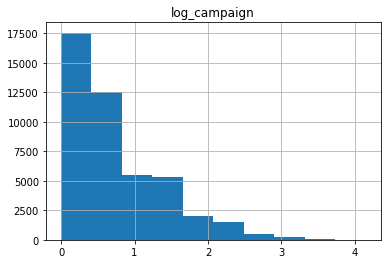

In [40]:
# drop duration to prevent data leakage
df_data_raw = df_data_raw.drop("duration", axis=1)

# Log transforming of the columns and checking for normality

df_data_raw["log_campaign"] = np.log(df_data_raw["campaign"])
df_data_raw.hist("log_campaign")

In [41]:
df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age             45211 non-null int64
job             45211 non-null object
marital         45211 non-null object
education       45211 non-null object
default         45211 non-null object
balance         45211 non-null int64
housing         45211 non-null object
loan            45211 non-null object
contact         45211 non-null object
day             45211 non-null int64
month           45211 non-null object
campaign        45211 non-null int64
pdays           45211 non-null int64
previous        45211 non-null int64
poutcome        45211 non-null object
Target          45211 non-null object
log_campaign    45211 non-null float64
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [42]:
# do on-hot-encoding for all categorical variables

# categorical_columns = ["job", "marital", "education", "default","housing", "loan", "contact","month", "poutcome"]
# df_data_raw1 = df_data_raw.drop("campaign", axis=1)
df_data_raw1 = df_data_raw.copy()

df_data_ohe = pd.get_dummies(df_data_raw1,drop_first=True)

# just_dummies = pd.get_dummies(df['dummy'])

In [43]:
df_data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
log_campaign           45211 non-null float64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education

#### 4.	Create the training set and test set in ration of 70:30

In [44]:
# drop 'campaign', since we are using 'log_campaign'
df_data_ohe.pop('campaign')
df_data_y = df_data_ohe.pop('Target_yes')
df_data_x = df_data_ohe


In [45]:
df_data_ohe

,age,balance,day,pdays,previous,log_campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,-1,0,0.000000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,-1,0,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,-1,0,0.000000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,-1,0,0.000000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,-1,0,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,-1,0,1.098612,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,-1,0,0.693147,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,184,3,1.609438,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,-1,0,1.386294,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [46]:
df_data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
log_campaign           45211 non-null float64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_secondary    45211 non-null uint8
education

In [47]:
x_train,x_test,y_train,y_test=train_test_split(df_data_x,df_data_y,test_size=0.3,random_state=1)

# check that class ratio is maintained in train_test_split
y_term_deposit_accepted = y_train[y_train == 1].count()
y_term_deposit_declined = y_train[y_train == 0].count()

y_train_percentage_accepted = (y_term_deposit_accepted/(y_term_deposit_accepted+y_term_deposit_declined))*100

print("Term deposit accepted (train): {}".format(y_train_percentage_accepted) +"%")


Term deposit accepted (train): 11.81154611811546%


In [48]:
y_term_deposit_accepted = y_test[y_test == 1].count()
y_term_deposit_declined = y_test[y_test == 0].count()

y_test_percentage_accepted = (y_term_deposit_accepted/(y_term_deposit_accepted+y_term_deposit_declined))*100

print("Term deposit accepted (test): {}".format(y_test_percentage_accepted) +"%")

Term deposit accepted (test): 11.43468003538779%


#### Comments: 
Class ratio has been maintained to a reasonable degree.

### Deliverable – 3 (create the ensemble model) – (20)

#### Decision Tree for initial test

In [49]:
dtcl = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dtcl.fit(x_train, y_train)
y_predict_DT = dtcl.predict(x_test)

# check for overfitting
y_predict_DT_train = dtcl.predict(x_train)

In [50]:
acc_DT = accuracy_score(y_test,y_predict_DT)
rec_DT = recall_score(y_test,y_predict_DT)
prec_DT = precision_score(y_test,y_predict_DT)
f1_DT = f1_score(y_test,y_predict_DT)
roc_auc_DT = roc_auc_score(y_test,y_predict_DT)

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree (initial test)'],
                          'Accuracy': acc_DT,
                          'Recall': rec_DT,
                          'Precision': prec_DT,
                          'F1 score': f1_DT,
                          'AUROCC score': roc_auc_DT,})
resultsDf

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948


In [52]:
# check for overfitting, since a decision tree is prone to overfitting

acc_DT_tr = accuracy_score(y_train,y_predict_DT_train)
rec_DT_tr = recall_score(y_train,y_predict_DT_train)
prec_DT_tr = precision_score(y_train,y_predict_DT_train)
f1_DT_tr = f1_score(y_train,y_predict_DT_train)
roc_auc_DT_tr = roc_auc_score(y_train,y_predict_DT_train)

In [53]:
tempResDf = pd.DataFrame({'Method':['Decision Tree (training data)'],
                          'Accuracy': acc_DT_tr,
                          'Recall': rec_DT_tr,
                          'Precision': prec_DT_tr,
                          'F1 score': f1_DT_tr,
                          'AUROCC score': roc_auc_DT_tr,})
resultsDf0 = pd.concat([resultsDf, tempResDf])
resultsDf0

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Decision Tree (training data),0.892533,0.173622,0.675338,0.276229,0.581222


Note: The model is not overfitting

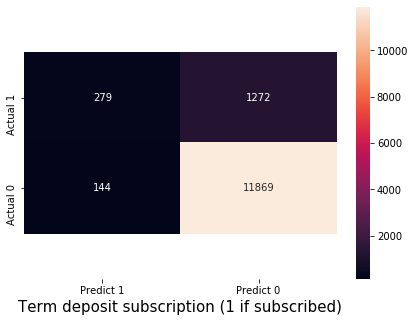

In [54]:
cm=metrics.confusion_matrix(y_test, y_predict_DT, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Term deposit subscription (1 if subscribed)', fontsize=15)
plt.show()

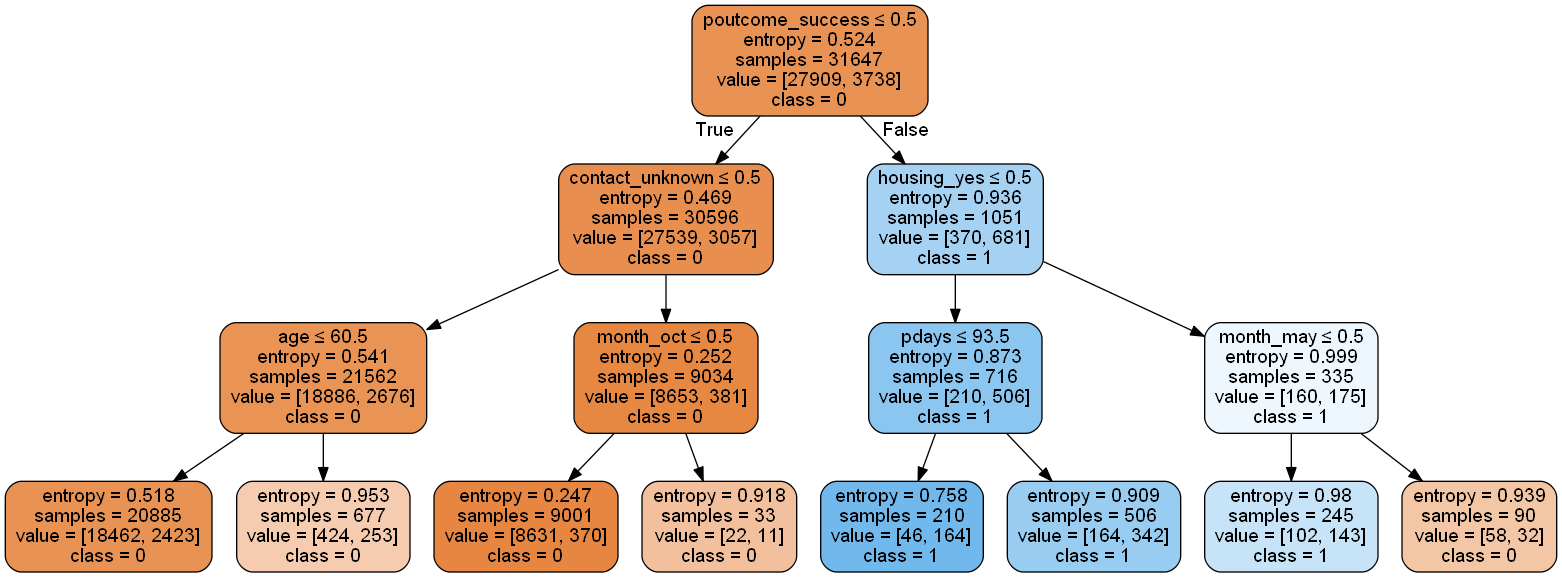

In [55]:
feature_cols = df_data_x.columns
dot_data = StringIO()
export_graphviz(dtcl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

Notes:

Due to the class imbalance of the target variable, the evaluation metrics of precision and recall must be used in addition to accuracy.

The performance of the Decision Tree is not excellent. The recall is very low, negativly affecting the model's performance (F1 score and AUROCC). This means that there is a large number of clients who are predicted that they will not subscribe to the term deposity who actually would.

Advantages:
Decision tree is a very basic model, and the method of arriving at a classification is easy to explain.

Disadvantages:
The model is prone to overfitting.

#### Use Random Forest

In [56]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)
y_predict_RF = rfcl.predict(x_test)

In [57]:
acc_RF = accuracy_score(y_test,y_predict_RF)
rec_RF = recall_score(y_test,y_predict_RF)
prec_RF = precision_score(y_test,y_predict_RF)
f1_RF = f1_score(y_test,y_predict_RF)
roc_auc_RF = roc_auc_score(y_test,y_predict_RF)

In [58]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResDf = pd.DataFrame({'Method':['Random forest'],
                          'Accuracy': acc_RF,
                          'Recall': rec_RF,
                          'Precision': prec_RF,
                          'F1 score': f1_RF,
                          'AUROCC score': roc_auc_RF,})
resultsDf1 = pd.concat([resultsDf, tempResDf])
resultsDf1

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504


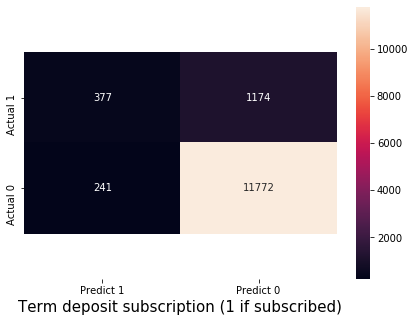

In [59]:
# confusion matirx

cm=metrics.confusion_matrix(y_test, y_predict_RF, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Term deposit subscription (1 if subscribed)', fontsize=15)
plt.show()

Notes:
The Random Forrest model performes a bit better than the Decision Tree, while still not excellent. The recall is still low, negativly affecting the model's performance (F1 score and AUROCC). 

#### AdaBoost

In [60]:
abcl = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)
y_predict_AB = abcl.predict(x_test)

In [61]:
acc_AB = accuracy_score(y_test,y_predict_AB)
rec_AB = recall_score(y_test,y_predict_AB)
prec_AB = precision_score(y_test,y_predict_AB)
f1_AB = f1_score(y_test,y_predict_AB)
roc_auc_AB = roc_auc_score(y_test,y_predict_AB)

In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResDf = pd.DataFrame({'Method':['AdaBoost'],
                          'Accuracy': acc_AB,
                          'Recall': rec_AB,
                          'Precision': prec_AB,
                          'F1 score': f1_AB,
                          'AUROCC score': roc_auc_AB,})
resultsDf2 = pd.concat([resultsDf1, tempResDf])
resultsDf2

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448


#### Bagging classifier

In [63]:
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)
y_predict_BC = bgcl.predict(x_test)

In [64]:
acc_BC = accuracy_score(y_test,y_predict_BC)
rec_BC = recall_score(y_test,y_predict_BC)
prec_BC = precision_score(y_test,y_predict_BC)
f1_BC = f1_score(y_test,y_predict_BC)
roc_auc_BC = roc_auc_score(y_test,y_predict_BC)

In [65]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResDf = pd.DataFrame({'Method':['Bagging'],
                          'Accuracy': acc_BC,
                          'Recall': rec_BC,
                          'Precision': prec_BC,
                          'F1 score': f1_BC,
                          'AUROCC score': roc_auc_BC,})
resultsDf3 = pd.concat([resultsDf2, tempResDf])
resultsDf3

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448
0,Bagging,0.893247,0.248872,0.576981,0.347748,0.612657


#### Gradient boosting

In [66]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)
y_predict_GB = gbcl.predict(x_test)

In [67]:
acc_GB = accuracy_score(y_test,y_predict_GB)
rec_GB = recall_score(y_test,y_predict_GB)
prec_GB = precision_score(y_test,y_predict_GB)
f1_GB = f1_score(y_test,y_predict_GB)
roc_auc_GB = roc_auc_score(y_test,y_predict_GB)

In [68]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResDf = pd.DataFrame({'Method':['Gradient boosting'],
                          'Accuracy': acc_GB,
                          'Recall': rec_GB,
                          'Precision': prec_GB,
                          'F1 score': f1_GB,
                          'AUROCC score': roc_auc_GB,})
resultsDf4 = pd.concat([resultsDf3, tempResDf])
resultsDf4

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448
0,Bagging,0.893247,0.248872,0.576981,0.347748,0.612657
0,Gradient boosting,0.895016,0.181818,0.645309,0.283702,0.584458


#### Light Gradient Boosting Machine

In [69]:
#  test Light Gradient Boosting Machine


lgbmcl = lgb.LGBMClassifier(boosting_type='gbdt',
                            n_estimators=1000, 
                            objective = 'binary', 
                            is_unbalance = 'true', 
                            learning_rate = 0.05, 
                            reg_alpha = 0.1, 
                            reg_lambda = 0.1, 
                            subsample = 0.8, 
                            n_jobs = -1, 
                            random_state = 50)

lgbmcl = lgbmcl.fit(x_train, y_train, eval_metric='roc_auc')
y_predict_LGBM = lgbmcl.predict(x_test)

In [70]:
acc_LGBM = accuracy_score(y_test,y_predict_LGBM)
rec_LGBM = recall_score(y_test,y_predict_LGBM)
prec_LGBM = precision_score(y_test,y_predict_LGBM)
f1_LGBM = f1_score(y_test,y_predict_LGBM)
roc_auc_LGBM = roc_auc_score(y_test,y_predict_LGBM)

In [71]:
tempResDf = pd.DataFrame({'Method':['Light gradient boosting machine'],
                          'Accuracy': acc_LGBM,
                          'Recall': rec_LGBM,
                          'Precision': prec_LGBM,
                          'F1 score': f1_LGBM,
                          'AUROCC score': roc_auc_LGBM,})
resultsDf5 = pd.concat([resultsDf4, tempResDf])
resultsDf5

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448
0,Bagging,0.893247,0.248872,0.576981,0.347748,0.612657
0,Gradient boosting,0.895016,0.181818,0.645309,0.283702,0.584458
0,Light gradient boosting machine,0.841345,0.572534,0.373580,0.452138,0.724292


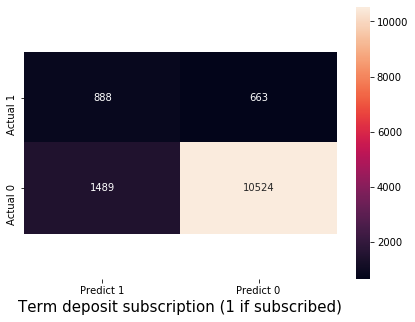

In [72]:
cm=metrics.confusion_matrix(y_test, y_predict_LGBM, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Term deposit subscription (1 if subscribed)', fontsize=15)
plt.show()

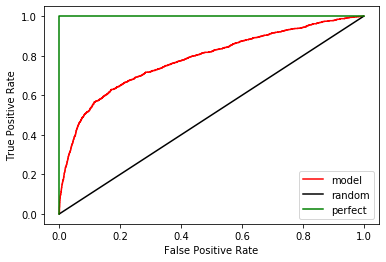

In [73]:
y_predict_prob = lgbmcl.predict_proba(x_test)
y_predict_prob_1 = y_predict_prob[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob_1)

plt.plot(fpr, tpr,'r-',label = 'model')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Light Gradient Boosting Machine produces the best result, with the AUROCC of 0.72. Recall is good, but precision is not great.

#### XGBoost

In [74]:
xgbclf = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
                           gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=10,
                           min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
                           objective='binary:logistic', reg_alpha=0, reg_lambda=1,
                           scale_pos_weight=1, seed=0, silent=True, subsample=1)

xgbclf.fit(x_train, y_train)
y_predict_XGB = xgbclf.predict(x_test)




In [75]:
acc_XGB = accuracy_score(y_test,y_predict_XGB)
rec_XGB = recall_score(y_test,y_predict_XGB)
prec_XGB = precision_score(y_test,y_predict_XGB)
f1_XGB = f1_score(y_test,y_predict_XGB)
roc_auc_XGB = roc_auc_score(y_test,y_predict_XGB)

In [76]:
tempResDf = pd.DataFrame({'Method':['XGBoost'],
                          'Accuracy': acc_XGB,
                          'Recall': rec_XGB,
                          'Precision': prec_XGB,
                          'F1 score': f1_XGB,
                          'AUROCC score': roc_auc_XGB,})
resultsDf6 = pd.concat([resultsDf5, tempResDf])
resultsDf6

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448
0,Bagging,0.893247,0.248872,0.576981,0.347748,0.612657
0,Gradient boosting,0.895016,0.181818,0.645309,0.283702,0.584458
0,Light gradient boosting machine,0.841345,0.572534,0.373580,0.452138,0.724292
0,XGBoost,0.892804,0.268859,0.565807,0.364510,0.621110


### Deliverable – 4 (Tuning the model) – (20)

Select Light Gradient Boosting Machine as most promising algorithm. Use grid search to tune model parameters.

In [77]:
params_dict={'n_estimators':[500,1000,1500], 'learning_rate':[0.01,0.05]}

clf_lgbmGS=GridSearchCV(estimator=LGBMClassifier(objective = 'binary', 
                                                 is_unbalance = 'true', 
                                                 reg_alpha = 0.1, 
                                                 reg_lambda = 0.1, 
                                                 subsample = 0.8, 
                                                 n_jobs = 1, 
                                                 random_state = 50),
                                                 param_grid=params_dict, 
                                                 scoring='roc_auc', 
                                                 cv=10)

clf_lgbmGS.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      is_unbalance='true', learning_rate=0.1,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=1, num_leaves=31,
                                      objective='binary', random_state=50,
                                      reg_alpha=0.1, reg_lambda=0.1,
                                      silent=True, subsample=0.8,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid

In [78]:
clf_lgbmGS.best_score_

0.7953557520516045

In [79]:
clf_lgbmGS.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [80]:
clf_lgbmGS = LGBMClassifier(n_estimators=1000,
                            objective = 'binary', 
                            is_unbalance = 'true', 
                            learning_rate = 0.01, 
                            reg_alpha = 0.1, 
                            reg_lambda = 0.1, 
                            subsample = 0.8, 
                            n_jobs = 1, 
                            random_state = 50)

clf_lgbmGS = clf_lgbmGS.fit(x_train, y_train, eval_metric='roc_auc')
y_predict_LGBM = clf_lgbmGS.predict(x_test)


In [81]:
acc_LGBM = accuracy_score(y_test,y_predict_LGBM)
rec_LGBM = recall_score(y_test,y_predict_LGBM)
prec_LGBM = precision_score(y_test,y_predict_LGBM)
f1_LGBM = f1_score(y_test,y_predict_LGBM)
roc_auc_LGBM = roc_auc_score(y_test,y_predict_LGBM)

In [82]:
tempResDf = pd.DataFrame({'Method':['Light gradient boosting machine, HP tuning'],
                          'Accuracy': acc_LGBM,
                          'Recall': rec_LGBM,
                          'Precision': prec_LGBM,
                          'F1 score': f1_LGBM,
                          'AUROCC score': roc_auc_LGBM,})
resultsDf7 = pd.concat([resultsDf6, tempResDf])
resultsDf7

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448
0,Bagging,0.893247,0.248872,0.576981,0.347748,0.612657
0,Gradient boosting,0.895016,0.181818,0.645309,0.283702,0.584458
0,Light gradient boosting machine,0.841345,0.572534,0.373580,0.452138,0.724292
0,XGBoost,0.892804,0.268859,0.565807,0.364510,0.621110
0,"Light gradient boosting machine, HP tuning",0.820333,0.639587,0.345645,0.448767,0.741628


Key hyperparameters:

learning_rate: the learning rate is a key parameter for tuning (default = 0.1).

num_iterations: larger num_iterations = higher accuracy but slower execution (initialised to 1000)

subsample: randomly select part of data without resampling (initialised to 0.8)



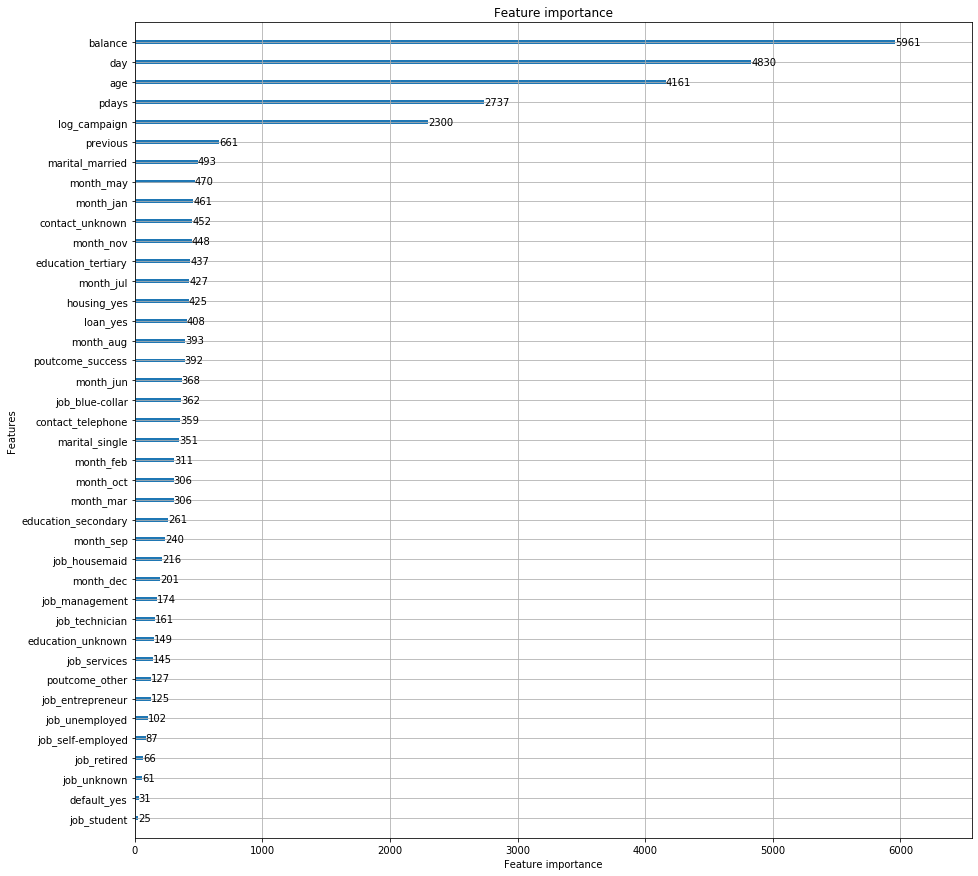

In [83]:
## Calculating feature importance

ax = lgb.plot_importance(clf_lgbmGS, max_num_features=40, figsize=(15,15))
plt.show()

### Extra - check model with campaign instead of log_campaign (since feature importance shows this is high importance)

In [84]:
df_data_ohe1 = pd.get_dummies(df_data_raw1,drop_first=True)

In [85]:
df_data_ohe1.pop('log_campaign')
df_data_y = df_data_ohe1.pop('Target_yes')
df_data_x = df_data_ohe1
x_train,x_test,y_train,y_test=train_test_split(df_data_x,df_data_y,test_size=0.3,random_state=1)

In [86]:
clf_lgbmGS = LGBMClassifier(n_estimators=1000,
                            objective = 'binary', 
                            is_unbalance = 'true', 
                            learning_rate = 0.01, 
                            reg_alpha = 0.1, 
                            reg_lambda = 0.1, 
                            subsample = 0.8, 
                            n_jobs = 1, 
                            random_state = 50)

clf_lgbmGS = clf_lgbmGS.fit(x_train, y_train, eval_metric='roc_auc')
y_predict_LGBM = clf_lgbmGS.predict(x_test)

In [87]:
roc_auc_LGBM = roc_auc_score(y_test,y_predict_LGBM)
roc_auc_LGBM

0.7416283605934534

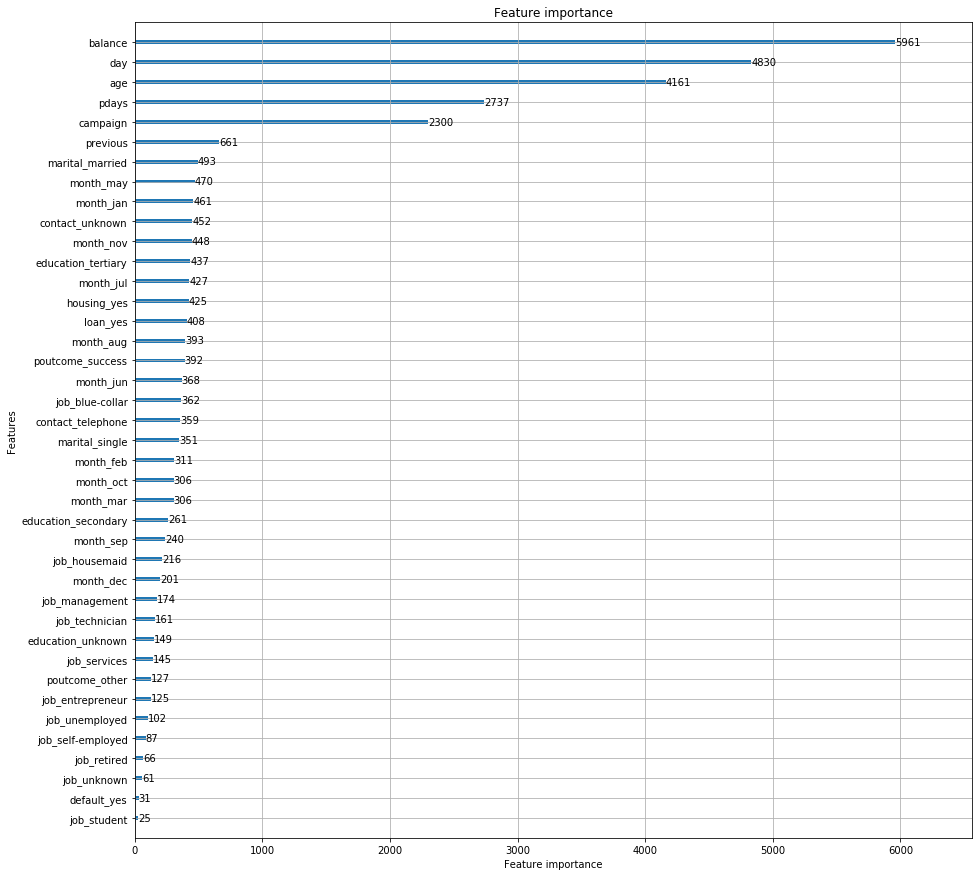

In [88]:
ax = lgb.plot_importance(clf_lgbmGS, max_num_features=40, figsize=(15,15))
plt.show()

Note: the use of 'campaign' and 'log_campaign' is precicely equivalent.

### Extra - use SMOTE to improve class imbalance

In [89]:
sm = SMOTE(sampling_strategy=0.2,random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

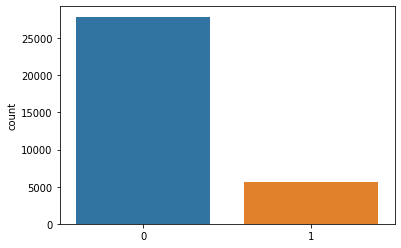

In [90]:
sns.countplot(y_train_res)

In [91]:
clf_lgbmSMT = LGBMClassifier(n_estimators=1000,
                            objective = 'binary', 
                            is_unbalance = 'true', 
                            learning_rate = 0.01, 
                            reg_alpha = 0.1, 
                            reg_lambda = 0.1, 
                            subsample = 0.8, 
                            n_jobs = 1, 
                            random_state = 50)

clf_lgbmSMT = clf_lgbmSMT.fit(x_train_res, y_train_res, eval_metric='roc_auc')
y_predict_LGBMSM = clf_lgbmSMT.predict(x_test)

In [92]:
acc_LGBMSM = accuracy_score(y_test,y_predict_LGBMSM)
rec_LGBMSM = recall_score(y_test,y_predict_LGBMSM)
prec_LGBMSM = precision_score(y_test,y_predict_LGBMSM)
f1_LGBMSM = f1_score(y_test,y_predict_LGBMSM)
roc_auc_LGBMSM = roc_auc_score(y_test,y_predict_LGBMSM)

In [93]:
tempResDf = pd.DataFrame({'Method':['Light gradient boosting machine SMOTE'],
                          'Accuracy': acc_LGBMSM,
                          'Recall': rec_LGBMSM,
                          'Precision': prec_LGBMSM,
                          'F1 score': f1_LGBMSM,
                          'AUROCC score': roc_auc_LGBMSM,})
resultsDf8 = pd.concat([resultsDf7, tempResDf])
resultsDf8

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448
0,Bagging,0.893247,0.248872,0.576981,0.347748,0.612657
0,Gradient boosting,0.895016,0.181818,0.645309,0.283702,0.584458
0,Light gradient boosting machine,0.841345,0.572534,0.373580,0.452138,0.724292
0,XGBoost,0.892804,0.268859,0.565807,0.364510,0.621110
0,"Light gradient boosting machine, HP tuning",0.820333,0.639587,0.345645,0.448767,0.741628
0,Light gradient boosting machine SMOTE,0.843409,0.594455,0.381465,0.464718,0.735003


Note: The use of SMOTE does not seem to improve the model performance

In [95]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [98]:
bal_rf = BalancedRandomForestClassifier()

clf_bal_fr = bal_rf.fit(x_train_res, y_train_res)
y_predict_bal_fr = clf_bal_fr.predict(x_test)

In [100]:
acc_BRF = accuracy_score(y_test,y_predict_bal_fr)
rec_BRF = recall_score(y_test,y_predict_bal_fr)
prec_BRF = precision_score(y_test,y_predict_bal_fr)
f1_BRF = f1_score(y_test,y_predict_bal_fr)
roc_auc_BRF = roc_auc_score(y_test,y_predict_bal_fr)

In [101]:
tempResDf = pd.DataFrame({'Method':['Balance random forrest'],
                          'Accuracy': acc_BRF,
                          'Recall': rec_BRF,
                          'Precision': prec_BRF,
                          'F1 score': f1_BRF,
                          'AUROCC score': roc_auc_BRF,})
resultsDf9 = pd.concat([resultsDf8, tempResDf])
resultsDf9

,Method,Accuracy,Recall,Precision,F1 score,AUROCC score
0,Decision Tree (initial test),0.895606,0.179884,0.659574,0.282675,0.583948
0,Random forest,0.895680,0.243069,0.610032,0.347626,0.611504
0,AdaBoost,0.893763,0.128304,0.690972,0.216422,0.560448
0,Bagging,0.893247,0.248872,0.576981,0.347748,0.612657
0,Gradient boosting,0.895016,0.181818,0.645309,0.283702,0.584458
0,Light gradient boosting machine,0.841345,0.572534,0.373580,0.452138,0.724292
0,XGBoost,0.892804,0.268859,0.565807,0.364510,0.621110
0,"Light gradient boosting machine, HP tuning",0.820333,0.639587,0.345645,0.448767,0.741628
0,Light gradient boosting machine SMOTE,0.843409,0.594455,0.381465,0.464718,0.735003
0,Balance random forrest,0.824462,0.621534,0.349529,0.447436,0.736098


In [109]:
import lime
import lime.lime_tabular

predict_fn = lambda x: clf_lgbmGS.predict_proba(x).astype(float)
X2 = x_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X2, feature_names = x_train.columns, kernel_width=5)


In [111]:
choosen_instance = x_test.values[1]
exp = explainer.explain_instance(choosen_instance, predict_fn, num_features=10)
exp.show_in_notebook(show_all=True)
